In [11]:
import numpy as np
import random
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [12]:
Tenor = np.array([4,6,8,11,14,16,18,20,23,26,28,30,32,35])/12
Quotes = np.array([184.85,184,183.55,183.15,183.30,183.80,183.90,183.75,183.60,184.05,184.60,185.25,185.30,185.05])

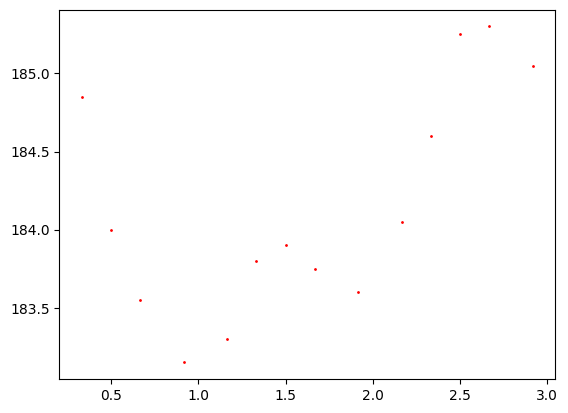

In [13]:
plt.scatter(Tenor,Quotes,s=1,color='r')

In [14]:
def NelsonSiegelModel(t, beta0, beta1, beta2,tau):
  funzione=beta0+beta1*(tau/t*(1-np.exp(-t/tau)))+beta2*(tau/t*(1-np.exp(-t/tau))-np.exp(-t/tau))
  return funzione

In [15]:
poptNS, pcovNS = curve_fit(NelsonSiegelModel, Tenor, Quotes/100)
print(poptNS)

[ 1.89038821 -0.01289975 -0.17190663  0.62391962]


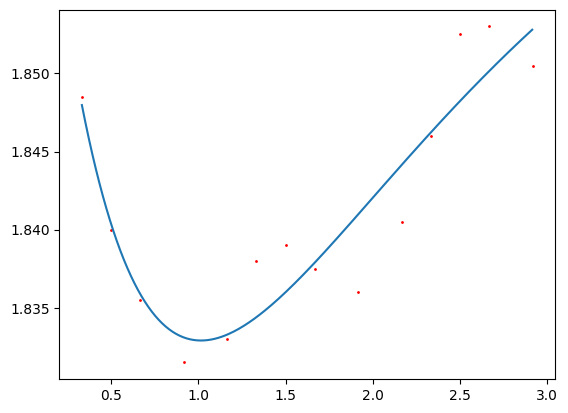

In [16]:
t=np.arange(start=min(Tenor),stop=max(Tenor),step=0.01)
Quotes_NS=NelsonSiegelModel(t,poptNS[0],poptNS[1],poptNS[2],poptNS[3])
plt.plot(t,Quotes_NS)
plt.scatter(Tenor,Quotes/100,s=1,color='r')
plt.show()

In [17]:
test_percentage=0.10
random.seed(29091984)
indx=random.sample(range(len(Tenor)-1),int(np.round(test_percentage*len(Tenor))))
print(len(indx)==len(np.unique(indx)))
Tenor_test=Tenor[indx]
Quotes_test=Quotes[indx]
Tenor_train=np.delete(Tenor,indx)
Quotes_train=np.delete(Quotes,indx)
print(len(Tenor_train)+len(Tenor_test)==len(Tenor))
print(len(Quotes_train)+len(Quotes_test)==len(Quotes))


True
True
True


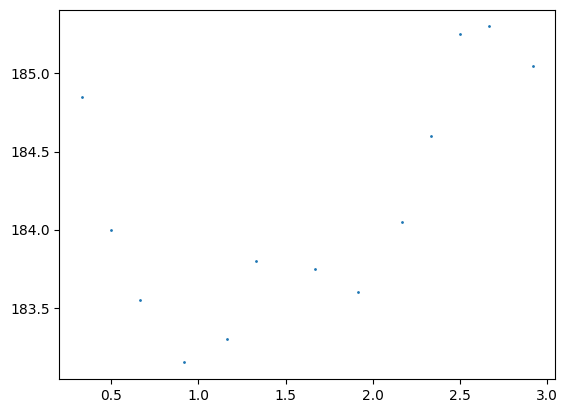

In [18]:
plt.scatter(Tenor_train,Quotes_train,s=1)

0.0832108992463466


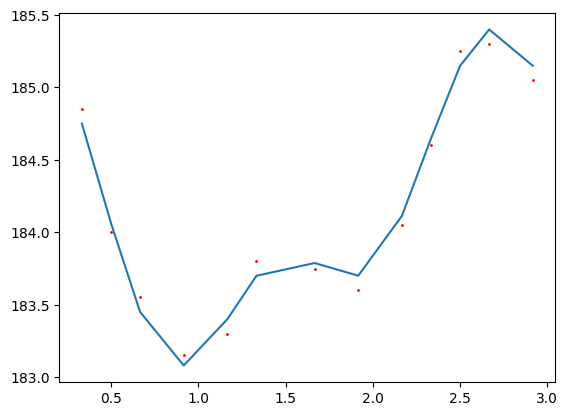

In [19]:
svr= SVR(kernel="rbf", C=50)
svr.fit(Tenor_train.reshape(-1, 1),Quotes_train)
Y_rbf_insample=svr.predict(Tenor_train.reshape(-1, 1))
plt.plot(Tenor_train.reshape(-1, 1),Y_rbf_insample)
plt.scatter(Tenor_train,Quotes_train,s=1,color='r')
InSampleMAE=mean_absolute_error(Quotes_train,Y_rbf_insample)
print(InSampleMAE)

In [21]:
Y_rbf_outsample=svr.predict(Tenor_test.reshape(-1, 1))
OutSampleMAE=mean_absolute_error(Quotes_test,Y_rbf_outsample)
print(OutSampleMAE)

0.06135212806816526


In [22]:
def MAE(Y_real,Y_Model):
    mae=np.mean(np.abs((Y_real-Y_Model)))
    return mae
print(MAE(Quotes_test,Y_rbf_outsample)==mean_absolute_error(Quotes_test,Y_rbf_outsample))

True


0.47008457366381695


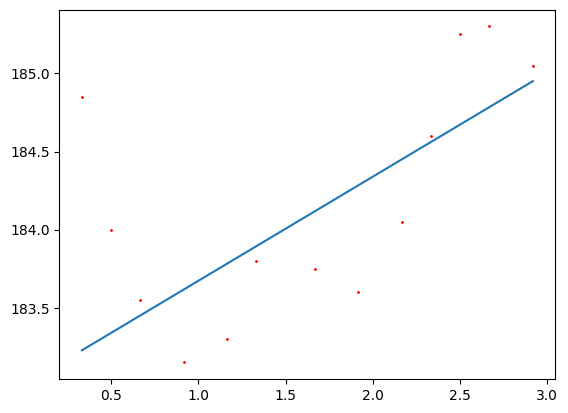

In [23]:
svr= SVR(kernel="linear", C=50)
svr.fit(Tenor_train.reshape(-1, 1),Quotes_train)
Y_rbf_insample=svr.predict(Tenor_train.reshape(-1, 1))
plt.plot(Tenor_train,Y_rbf_insample)
plt.scatter(Tenor_train,Quotes_train,s=1,color='r')
InSampleMAE=mean_absolute_error(Quotes_train,Y_rbf_insample)
print(InSampleMAE)

In [24]:
svr= SVR(kernel="poly", degree=4, C=20)
svr.fit(Tenor_train.reshape(-1, 1),Quotes_train)
Y_poly2_insample=svr.predict(Tenor_train.reshape(-1, 1))
InSampleMAE=mean_absolute_error(Quotes_train,Y_poly2_insample)
print(InSampleMAE)

0.37146643811482905


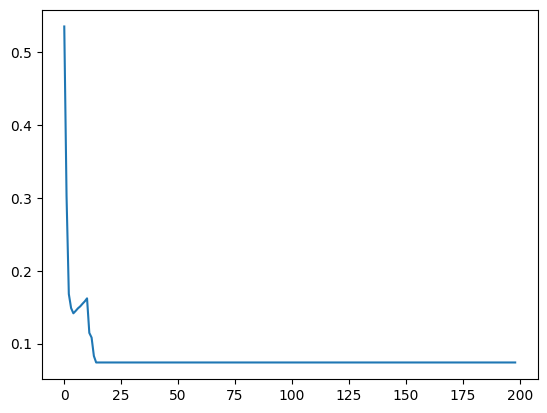

In [25]:
C_range=np.arange(1,200)
OutSampleMAE=np.zeros(len(C_range))
Tenor_train, Tenor_test, Quotes_train, Quotes_test,  = train_test_split(Tenor, Quotes, test_size=0.10, random_state=29091984)
for i in C_range:
  svr= SVR(kernel="rbf", C=i)
  svr.fit(Tenor_train.reshape(-1, 1),Quotes_train)
  Y_rbf_outsample=svr.predict(Tenor_test.reshape(-1, 1))
  OutSampleMAE[i-1]=mean_absolute_error(Quotes_test,Y_rbf_outsample)
plt.plot(OutSampleMAE)

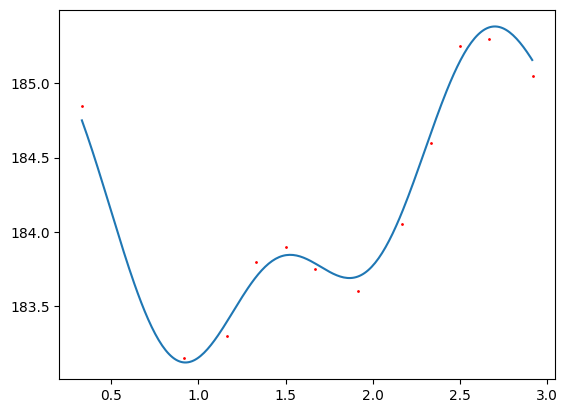

In [26]:
svr= SVR(kernel="rbf", C=24)
svr.fit(Tenor_train.reshape(-1, 1),Quotes_train)
Y_rbf=svr.predict(t.reshape(-1, 1))
plt.plot(t,Y_rbf)
plt.scatter(Tenor_train,Quotes_train,s=1,color='r')

0.012463754212561184 0.41468699056686376 0.16876527749337789 0.09799285667046716


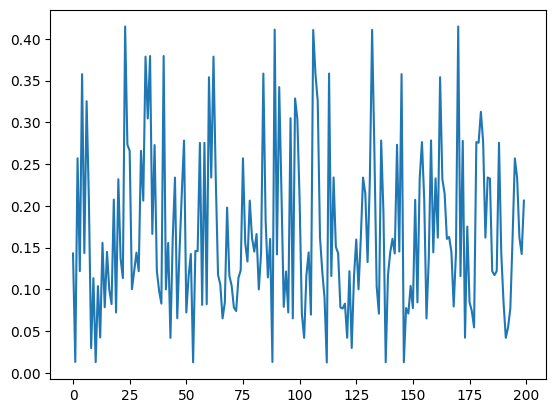

In [28]:
NRepl=200
OutSampleMAE=np.zeros(200)
for i in range(NRepl):
  Tenor_train, Tenor_test, Quotes_train, Quotes_test,  = train_test_split(Tenor, Quotes, test_size=0.10, random_state=i)
  svr= SVR(kernel="rbf", C=24)
  svr.fit(Tenor_train.reshape(-1, 1),Quotes_train)
  Y_rbf_outsample=svr.predict(Tenor_test.reshape(-1, 1))
  OutSampleMAE[i]=mean_absolute_error(Quotes_test,Y_rbf_outsample)
print(min(OutSampleMAE), max(OutSampleMAE), np.mean(OutSampleMAE), np.std(OutSampleMAE))
plt.plot(OutSampleMAE)